In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
SEED = 42

In [2]:
os.listdir('./data/input')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [3]:
train_df = pd.read_csv('./data/input/train.csv')
test_df = pd.read_csv('./data/input/test.csv')

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df = pd.concat([train_df.drop('SalePrice', axis=1), test_df]).reset_index().drop('index', axis=1)
train_labels = train_df['SalePrice']

In [6]:
train_labels.mean()

180921.19589041095

In [7]:
from scipy import stats

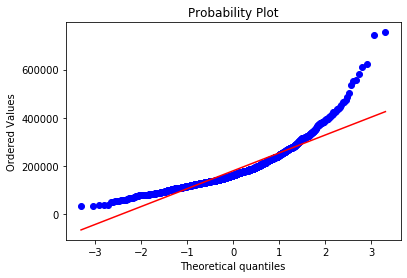

In [8]:
fig = plt.figure()
res = stats.probplot(train_labels, plot=plt)
plt.show()

In [9]:
def transform_labels(labels):
    return np.log1p(labels)

def inverse_transform_labels(predicted_labels):
    return np.expm1(predicted_labels)

transformed_train_labels = np.log1p(train_labels)

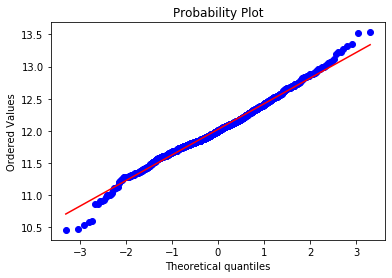

In [10]:
fig = plt.figure()
res = stats.probplot(transformed_train_labels, plot=plt)
plt.show()

In [11]:
df.shape

(2919, 80)

In [12]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [14]:
column_null = df.isnull().sum()
column_null = pd.concat([column_null, df.dtypes], axis=1)
column_null.columns = ['count', 'dtype']
column_null = column_null[column_null['count'] > 0]
column_null

,count,dtype
MSZoning,4,object
LotFrontage,486,float64
Alley,2721,object
Utilities,2,object
Exterior1st,1,object
Exterior2nd,1,object
MasVnrType,24,object
MasVnrArea,23,float64
BsmtQual,81,object
BsmtCond,82,object


In [15]:
from sklearn.impute import SimpleImputer

In [16]:
mean_col = []
mode_col = []

In [17]:
column_null[column_null['dtype'] == 'object']

,count,dtype
MSZoning,4,object
Alley,2721,object
Utilities,2,object
Exterior1st,1,object
Exterior2nd,1,object
MasVnrType,24,object
BsmtQual,81,object
BsmtCond,82,object
BsmtExposure,82,object
BsmtFinType1,79,object


In [18]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [19]:
mode_col.append('MSZoning')

In [20]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [21]:
df['Alley'] = df['Alley'].fillna('None')

In [22]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [23]:
df['Utilities'] = df['Utilities'].fillna('None')

In [24]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [25]:
mode_col.append('Exterior1st')
mode_col.append('Exterior2nd')
mode_col.append('Electrical')
mode_col.append('KitchenQual')
mode_col.append('Functional')
mode_col.append('SaleType')

In [26]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
df['PoolQC'] = df['PoolQC'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [27]:
column_null[column_null['dtype'] == 'float64']

,count,dtype
LotFrontage,486,float64
MasVnrArea,23,float64
BsmtFinSF1,1,float64
BsmtFinSF2,1,float64
BsmtUnfSF,1,float64
TotalBsmtSF,1,float64
BsmtFullBath,2,float64
BsmtHalfBath,2,float64
GarageYrBlt,159,float64
GarageCars,1,float64


In [28]:
mean_col.append('LotFrontage')

In [29]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)

In [30]:
for col in mean_col:
    df[col] = df[col].fillna(df[col].mean())
    
for col in mode_col:
    df[col] = df[col].fillna(df[col].mode())

In [31]:
def one_hot_df(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    df = df.drop(cols, axis=1)
    return df

In [32]:
def normalize_df(df, cols):
    for each in cols:
        df[each] = (df[each]-df[each].min())/(df[each].max()-df[each].min())
    return df

In [33]:
def standardize_df(df, cols):
    for each in cols:
        df[each] = df[each]-df[each].mean()/df[each].std()
    return df

In [34]:
dtypes = df.dtypes
df = one_hot_df(df, list(dtypes[dtypes == 'object'].index))
df = normalize_df(df, list(df.drop('Id', axis=1).columns))

In [35]:
X = df[df['Id'].isin(train_df['Id'])]
X = pd.concat([X, transformed_train_labels], axis=1)
msk = np.random.rand(len(X)) < 0.8
X_train = X[msk]
y_train = X_train['SalePrice']
X_train = X_train.drop('SalePrice', axis=1)
X_eval = X[~msk]
y_eval = X_eval['SalePrice']
X_eval = X_eval.drop('SalePrice', axis=1)
X_test = df[~df['Id'].isin(train_df['Id'])]

In [36]:
# def get_param_grid(model_type='ridge'):
#     np.random.seed(SEED)
#     if (model_type == "ridge") or (model_type == "lasso"):
#         param_grid = {
#             "regressor__alpha": stats.uniform.rvs(loc=0, scale=4, size=3),
#             "regressor__normalize": [True, False],
#         }
#     elif model_type == "elastic_net":
#         param_grid = {
#             "regressor__alpha": stats.uniform.rvs(loc=0, scale=4, size=3),
#             "regressor__l1_ratio": np.random.uniform(0, 1, 10),
#             "regressor__normalize": [True, False],
#         }
#     elif model_type == "random_forest":
#         param_grid = {
#             "regressor__n_estimators": stats.randint(200, 2000),
#             "regressor__max_features": ["auto", "sqrt", "log2"],
#             "regressor__max_depth": stats.randint(3, 10),
#             "regressor__min_samples_split": stats.randint(2, 10),
#             "regressor__min_samples_leaf": stats.randint(1, 10),
#             "regressor__bootstrap": [True, False],
#         }
#     elif model_type == "xgboost":
#         param_grid = {
#             "regressor__n_estimators": stats.randint(200, 2000),
#             "regressor__learning_rate": np.random.uniform(1e-3, 0.2, 100),
#             "regressor__subsample": np.random.uniform(0.9, 1, 100),
#             "regressor__max_depth": stats.randint(3, 10),
#             "regressor__colsample_bytree": np.random.uniform(0.7, 1, 100),
#             "regressor__min_child_weight": stats.randint(1, 5),
#             "regressor__gamma": np.random.uniform(0.5, 5, 100),
#         }
#     elif model_type == "svr":
#         param_grid = {
#             "regressor__kernel": ["linear", "poly", "rbf"],
#             "regressor__degree": stats.randint(1, 5),
#             "regressor__gamma": ["auto", "scale"],
#             "regressor__C": np.random.uniform(0, 10, 100),
#         }
#     else:
#         param_grid = {}
#     return param_grid

In [37]:
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    max_error,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [39]:
params = [
    Pipeline([('linear', LinearRegression())]),
    Pipeline([('ridge', Ridge())]),
    Pipeline([('lasso', Lasso())]),
    Pipeline([('elastic_net', ElasticNet())]),
    Pipeline([('random_forest', RandomForestRegressor())])
]

In [46]:
for model in params:
    model.fit(X_train, y_train)
    pred_eval = model.predict(X_eval)
#     reverted_y_eval = y_eval
    reverted_pred_eval = inverse_transform_labels(pred_eval)
    reverted_y_eval = inverse_transform_labels(y_eval)
    print('%s:\t%.2f\t%.2f' % (model.steps[0][0], mean_squared_error(pred_eval, y_eval),mean_squared_error(reverted_pred_eval, reverted_y_eval)**0.5))

linear:	0.03	48724.83
ridge:	0.02	35292.93
lasso:	0.15	78454.53
elastic_net:	0.15	78458.13
random_forest:	0.02	36380.81


In [43]:
y_train.mean()

12.024300183501085

In [44]:
y_eval.mean()

12.023025106771867

In [41]:
inverse_transform_labels(y_train).mean()

181133.40524534686

In [42]:
inverse_transform_labels(y_eval).mean()

180018.92446043168